---
authors:
  - name: Vidya Balachander
    affiliation: University of Washington
    email: vbalac@uw.edu
    github: https://github.com/vidyabalachander
    linkedin: https://www.linkedin.com/in/vidya-balachander/
---

# A Global Analysis of Life Expectancy, Aging Populations and Gender Equality

## Research Questions
1) How does life expectancy correlate with sanitation?
 - Life Expectancy and Sanitation are positively correlated.
2) Are countries with rapidly aging populations experiencing slower economic growth?
 - No, we cannot conclude this.
3) Is there a connection between gender inequality index and life expectancy disparity between men and women?
 - No, we cannot conclude this.

## Motivation

I’ve always been interested in geography and population demographics ever since I took AP Human Geography in high school. Also, I’ve always wondered what factors influence the wide range of life expectancies in different countries. Is it related to economics, education levels, healthcare spending or something else? Maybe a combination of all three? Also, as a woman I’m interested in looking at the relationship between gender inequality and the gap between male and female life expectancies since I know that women live longer on average, but I want to see how that is affected by inequality.

## Data Setting

I will be using the World Development Indicators dataset from the World Bank. It has over 1,600 indicators and represents 266 countries over decades making it an incredibly comprehensive demographic dataset.

Examples of some of the indicators I will use:
- GDP per capita (current USD)
- Life expectancy at birth (years)
- Age dependency ratio, old (% of working-age population)

Some potential complications of this dataset are:
 - Datapoints are missing for some countries during some years
 - Countries may have different methods of data collection which may lead to some inconsistencies.
 - Some of these factors might affect each other but have non-linear relationship which may make it difficult to analyze data

# EDA

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
sns.set_theme()

In [2]:
def scatter(df, x, y, size=None, color=None, hue=None, title="", xlabel="", ylabel="", caption="", alt_text=""):
    """Creates a scatter plot using seaborn with optional size and color encoding. Includes title, axis labels, caption, and alt text.
    Returns nothing, just displays the plot directly.
    """
    ax = sns.relplot(data=df, x=x, y=y, hue=hue, size=size, sizes= (10, 1000), kind="scatter")
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    print(f"Caption: {caption}\nAlt text: {alt_text}\n")

def lineplot(df, x, y, hue=None, title="", xlabel="", ylabel="", caption="",  alt_text=""):
    """Creates a line plot using seaborn with optional hue encoding. Includes title, axis labels, caption, and alt text.
    Returns nothing, just displays the plot directly.
    """
    ax = sns.relplot(data=df, x=x, y=y, hue=hue, kind="line")
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    print(f"Caption: {caption}\nAlt text: {alt_text}\n")

## World Development Indicators (WDI)

In [3]:
# Load the WDI data and remove the last 5 summary rows
wdi = pd.read_csv("wdi.csv", encoding="latin1")
wdi.drop(wdi.index[-5:], inplace=True)
wdi

,Country Name,Country Code,Series Name,Series Code,2024 [YR2024],2023 [YR2023],2022 [YR2022],2021 [YR2021],2020 [YR2020],2019 [YR2019],...,1969 [YR1969],1968 [YR1968],1967 [YR1967],1966 [YR1966],1965 [YR1965],1964 [YR1964],1963 [YR1963],1962 [YR1962],1961 [YR1961],1960 [YR1960]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,42647492,41454761,40578842,40000412,39068979,37856121,...,11017409,10756922,10505959,10266395,10036008,9814318,9604487,9404406,9214083,9035043
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,66.035,65.617,60.417,61.454,62.941,...,36.979,36.51,36.042,35.583,35.124,34.673,34.201,33.757,33.291,32.799
2,Afghanistan,AFG,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,..,64.467,63.941,57.052,58.455,59.91,...,36.287,35.825,35.324,34.877,34.438,34.004,33.543,33.098,32.626,32.136
3,Afghanistan,AFG,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,..,67.536,67.236,64.079,64.656,66.144,...,37.758,37.281,36.851,36.38,35.9,35.428,34.945,34.502,34.043,33.549
4,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,2.26694373649188,-6.24017199240269,-20.7388393676343,-2.35110067203466,3.91160341625552,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,73.3297162833404,72.9690157226638,71.2154841745704,72.1822239463873,72.8689103086688,...,57.6800785564019,57.3352975180805,56.9037526493978,56.4490075635883,55.926447643924,56.0966979719764,55.6522285444853,55.2860734026534,52.7972301278289,50.9418860745353
1592,World,WLD,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,..,70.9509824812085,70.5865297779335,68.8457227034894,69.6938651146375,70.5179407959146,...,55.5639101213891,55.2118576945869,54.7927806960897,54.361842574,53.7938826509021,54.0638521424664,53.6438578535896,53.2892385505192,50.8534751477021,49.0329289941033
1593,World,WLD,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,..,75.8433123202811,75.4914707227111,73.7443179940467,74.8456326084263,75.3489068020102,...,59.9676063746238,59.634048012983,59.1856128498586,58.7074375098789,58.2481172573786,58.2995430590897,57.833928221655,57.4591443871999,54.9207634428588,53.0299591998556
1594,World,WLD,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.86326302627853,2.94333273070461,3.35991138278709,6.41954127739832,-2.84908234670674,2.71004016031682,...,5.99121349188727,5.96513976675233,3.81510333514781,5.46585667174196,5.63011941423086,6.55870216905303,5.00217755853545,5.32924080938184,4.05120144521081,..


### Number of rows and columns 

In [4]:
wdi.shape

(1596, 69)

The above code shows that the dataset contains 1596 rows and 69 columns. Each row represents a single indicator for a specific country and every column aside from the first four represents the year from 1960 to 2024 and contains the value of the specifc indicator for that year.

### Missing Data


In [5]:
wdi = wdi.replace("..", pd.NA)
missing = wdi.isna().sum()
missing[missing > 0]

2024 [YR2024]    834
2023 [YR2023]     22
2022 [YR2022]     15
2021 [YR2021]     14
2020 [YR2020]     14
                ... 
1964 [YR1964]    127
1963 [YR1963]    127
1962 [YR1962]    124
1961 [YR1961]    131
1960 [YR1960]    279
Length: 65, dtype: int64

In [6]:
percent_missing = wdi.isna().sum().sum() / (wdi.shape[0] * wdi.shape[1]) * 100
print(f"Total missing data: {percent_missing:.2f}%")

Total missing data: 4.05%


In this uncleaned dataset, missing data is represented by "..". There are 65 rows with missing data and 4.05% of the total data is missing. 

Missing Data is extremely prevalent in the earlier years of data collection espcially in countries with relatively lower GDPs. Additionally, the year 2024 has a lot of missing data probably due to the fact that the dataset hasn't been updated with the 2024 values yet.

To work with the missing data, I plan to remove the 2024 data entirely and replace all of the ".." cells with NaN, which is better for computations.

In [7]:

id_cols = wdi.columns[:4].tolist()

wdi = wdi.melt(
    id_vars=id_cols,
    var_name="Year",
    value_name="Indicator Value"
)

wdi["Year"] = wdi["Year"].str.extract(r"(\d{4})") 
wdi["Year"] = pd.to_numeric(wdi["Year"], errors="coerce")

wdi["Indicator Value"] = wdi["Indicator Value"].replace("..", pd.NA)
wdi["Indicator Value"] = pd.to_numeric(wdi["Indicator Value"], errors="coerce")

wdi = wdi[wdi["Year"] != 2024]

wdi = wdi.dropna(subset=["Indicator Value"])

wdi = wdi.pivot_table(
    index=[id_cols[0], id_cols[1], "Year"],  # Country Name, Country Code, Year
    columns=id_cols[2],  # Series Name
    values="Indicator Value"
)

wdi

Series Name                     Age dependency ratio, old (% of working-age population)  \
Country Name Country Code Year                                                            
Afghanistan  AFG          1960                                           5.112019         
                          1961                                           5.092907         
                          1962                                           5.069176         
                          1963                                           5.046569         
                          1964                                           5.029460         
...                                                                           ...         
Zimbabwe     ZWE          2019                                           6.554177         
                          2020                                           6.604042         
                          2021                                           6.598137         
                          2022                                           6.586732         
                          2023                                           6.571795         

Series Name                     GDP growth (annual %)  \
Country Name Country Code Year                          
Afghanistan  AFG          1960                    NaN   
                          1961                    NaN   
                          1962                    NaN   
                          1963                    NaN   
                          1964                    NaN   
...                                               ...   
Zimbabwe     ZWE          2019              -6.332450   
                          2020              -7.816933   
                          2021               8.468039   
                          2022               6.139176   
                          2023               5.336770   

Series Name                     Life expectancy at birth, female (years)  \
Country Name Country Code Year                                             
Afghanistan  AFG          1960                                    33.549   
                          1961                                    34.043   
                          1962                                    34.502   
                          1963                                    34.945   
                          1964                                    35.428   
...                                                                  ...   
Zimbabwe     ZWE          2019                                    63.049   
                          2020                                    63.747   
                          2021                                    62.289   
                          2022                                    64.544   
                          2023                                    65.013   

Series Name                     Life expectancy at birth, male (years)  \
Country Name Country Code Year                                           
Afghanistan  AFG          1960                                  32.136   
                          1961                                  32.626   
                          1962                                  33.098   
                          1963                                  33.543   
                          1964                                  34.004   
...                                                                ...   
Zimbabwe     ZWE          2019                                  58.830   
                          2020                                  59.091   
                          2021                                  57.717   
                          2022                                  59.880   
                          2023                                  60.226   

Series Name                     Life expectancy at birth, total (years)  \
Country Name Country Code Year                 

### Variables of Interest

The World Bank, which manages the World Development Indicators dataset, has over 1600 indicators across 266 countries with data since the 1960s. Due to the fact that the amount of data is so large, they allow you to choose which indicators, countries, and years you want to focus on and create a CSV dataset with just the information you need. I was able to select only the indicators that were relevant to my research questions across all countries and years. Thus, all of my variables are variables of interest.


1) Life expectancy at birth, total (years)
* Represents the life expectancy in a given year in a given country for all genders
* Useful for RQ1, "How does life expectancy correlate with sanitation?"

In [8]:
wdi["Life expectancy at birth, total (years)"].describe()

count    16926.000000
mean        64.735089
std         11.080180
min         10.989000
25%         57.661500
50%         67.091500
75%         72.914677
max         86.372000
Name: Life expectancy at birth, total (years), dtype: float64

2) Life expectancy at birth, male (years)	
* Represents the life expectancy in a given year in a given country for men
* Useful for RQ3, "Is there a connection between gender inequality index and life expectancy disparity between men and women?" to compute the life expectancy disparity between males and females

In [9]:
wdi["Life expectancy at birth, male (years)"].describe()

count    16926.000000
mean        62.292934
std         10.684209
min         10.128000
25%         55.634000
50%         64.320185
75%         69.979666
max         84.448000
Name: Life expectancy at birth, male (years), dtype: float64

3) Life expectancy at birth, female (years)	
* Represents the life expectancy in a given year in a given country for women
* Useful for RQ3, "Is there a connection between gender inequality index and life expectancy disparity between men and women?" to compute the life expectancy disparity between males and females

In [10]:
wdi["Life expectancy at birth, female (years)"].describe()

count    16926.000000
mean        67.315303
std         11.574074
min         11.274000
25%         59.797250
50%         69.888000
75%         76.129500
max         88.504000
Name: Life expectancy at birth, female (years), dtype: float64

4) GDP growth (annual %)
* Represents the annual percentage of growth of a country's GDP
* Useful for RQ2 "Are countries with rapidly aging populations experiencing slower economic growth?"

In [11]:
wdi["GDP growth (annual %)"].describe()

count    13882.000000
mean         3.682081
std          6.221632
min        -64.047107
25%          1.409164
50%          3.815640
75%          6.121946
max        149.972963
Name: GDP growth (annual %), dtype: float64

5) Age dependency ratio, old (% of working-age population)
* Represents the number of individuals aged 65 or older per 100 people of working age
* Useful for RQ2 "Are countries with rapidly aging populations experiencing slower economic growth?"

In [12]:
wdi["Age dependency ratio, old (% of working-age population)"].describe()

count    16930.000000
mean        10.641679
std          6.898877
min          1.011724
25%          6.007311
50%          7.774416
75%         13.751465
max         74.791927
Name: Age dependency ratio, old (% of working-age population), dtype: float64

### Plotting Variables

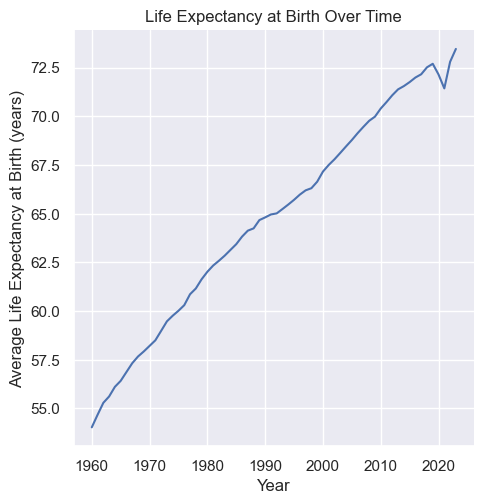

Caption: This scatter plot shows the trend of life expectancy at birth from various countries over the years.
Alt text: A scatter plot with Year on the x-axis and Life Expectancy at Birth on the y-axis, showing an upward trend over time.
2021 data point is lower than 2020.



In [13]:
avg_life_exp = wdi.groupby("Year")["Life expectancy at birth, total (years)"].mean().reset_index()

lineplot(avg_life_exp, x="Year", y="Life expectancy at birth, total (years)", hue=None,
        title="Life Expectancy at Birth Over Time",
        xlabel="Year",
        ylabel="Average Life Expectancy at Birth (years)",
        caption="This scatter plot shows the trend of life expectancy at birth from various countries over the years.",
        alt_text="A scatter plot with Year on the x-axis and Life Expectancy at Birth on the y-axis, showing an upward trend over time.\n2021 data point is lower than 2020."
)

The variables represented in the plot are the years on the x-axis and the average life expectancy at birth on the y-axis. I chose to plot this because I wanted to see how the average life expectancy has changed over time. Overall, the life expectancy is rising pretty linearly with respect to time. It's really interesting to see how 2021's average life expectancy is lower than 2020's, which I assume is most likely due to the COVID-19 Pandemic. This graph shows that on average people all across the world are living longer--a great thing to see!

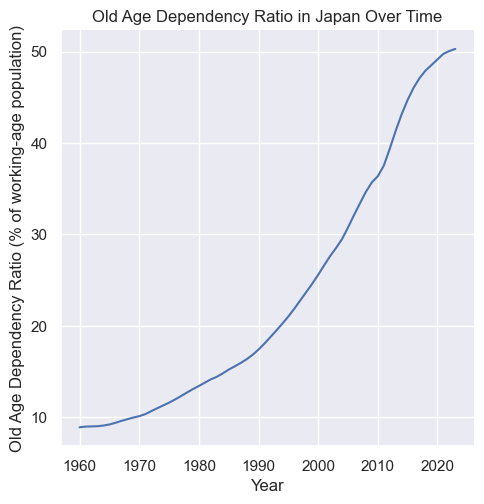

Caption: This line plot illustrates the trend of the old age dependency ratio in Japan over the years 1960 to 2023.
Alt text: A line plot with Year on the x-axis and Old Age Dependency Ratio on the y-axis, showing an increasing trend over time.



In [14]:
# old age dependency ratio in Japan over time
wdi.reset_index(inplace=True)
japan_old_age_dep = wdi[wdi["Country Name"] == "Japan"]
lineplot(japan_old_age_dep, x="Year", y="Age dependency ratio, old (% of working-age population)",
        title="Old Age Dependency Ratio in Japan Over Time",
        xlabel="Year",
        ylabel="Old Age Dependency Ratio (% of working-age population)",
        caption="This line plot illustrates the trend of the old age dependency ratio in Japan over the years 1960 to 2023.",
        alt_text="A line plot with Year on the x-axis and Old Age Dependency Ratio on the y-axis, showing an increasing trend over time."
)

The variables represented in the plot are the Year on the x-axis and the Old Age Dependency Ratio (the number of individuals aged 65 or older per 100 people of working age) on the y-axis. I've heard so much about Japan's population demographics, the most important thing being 1) how women are having fewer children each year and 2) how Japan has one of the highest life expectancies for countries in the world. Both of these factos cause the average age in Japan to increase each year. I know that this means fewer working members of society compared to the old age population so I wanted to see this represented on a graph to visualize it. From the graph you can see an upward trend in the rate of old age dependency ratio from the 1960s to the mid-2010s. After the mid-2010s, the old age dependency ratio continues to increase but at a slower rate than before. 

## Gender Inequality Index (GII)

In [15]:
# Load the GII data and remove the last 5 summary rows
gii = pd.read_excel("un_gii.xlsx")
gii

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
0,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2008,0.690,NaN
1,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2009,0.696,NaN
2,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2010,0.704,NaN
3,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2011,0.716,NaN
4,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2012,0.731,NaN
...,...,...,...,...,...,...,...,...,...,...
4595,ZWE,Zimbabwe,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2019,0.525,NaN
4596,ZWE,Zimbabwe,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2020,0.519,NaN
4597,ZWE,Zimbabwe,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2021,0.519,NaN
4598,ZWE,Zimbabwe,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2022,0.520,NaN


In [16]:
# Show the shape of the WDI dataset, i.e., number of rows and columns in a tuple
gii.shape

(4600, 10)

The above code shows that the dataset contains 4600 rows and 10 columns. Each row represents a country in a specific year from 1990 to 2023 (although many countries do not have data for all years) and the corresponding value of the Gender Inequality Index (GII). For example, the first row shows GII data for Afghanistan in 2008 and the second row shows GII data for Afghanistan in 2009. The only important rows are "countryISOCode" (which is a standard that identifies countries, dependent territories, and special areas), "country" (the name of the country), "year" (the year for the data), and value (the GII value assigned to the country in that year). Since I was able to choose from the UN Human Development Reports website the exact indicators I wanted, I was able to pre-remove most of the unnecessary columns but some work still needs to be done to remove the other columns.

In [17]:
gii.drop(["indexCode", "index", "dimension", "indicatorCode", "indicator", "note"], axis=1, inplace=True)
gii.rename(columns={'value': 'GII'}, inplace=True)
gii

,countryIsoCode,country,year,GII
0,AFG,Afghanistan,2008,0.690
1,AFG,Afghanistan,2009,0.696
2,AFG,Afghanistan,2010,0.704
3,AFG,Afghanistan,2011,0.716
4,AFG,Afghanistan,2012,0.731
...,...,...,...,...
4595,ZWE,Zimbabwe,2019,0.525
4596,ZWE,Zimbabwe,2020,0.519
4597,ZWE,Zimbabwe,2021,0.519
4598,ZWE,Zimbabwe,2022,0.520


### Missing Data

In [18]:
gii_years = range(1990, 2023)

countries = gii["country"].unique()

full_index = pd.MultiIndex.from_product(
    [countries, gii_years],
    names=["country", "year"]
)

gii_missing = gii.set_index(["country", "year"]).reindex(full_index).reset_index()
gii_missing

,country,year,countryIsoCode,GII
0,Afghanistan,1990,NaN,NaN
1,Afghanistan,1991,NaN,NaN
2,Afghanistan,1992,NaN,NaN
3,Afghanistan,1993,NaN,NaN
4,Afghanistan,1994,NaN,NaN
...,...,...,...,...
5671,Zimbabwe,2018,ZWE,0.520
5672,Zimbabwe,2019,ZWE,0.525
5673,Zimbabwe,2020,ZWE,0.519
5674,Zimbabwe,2021,ZWE,0.519


In [19]:
missing = gii_missing["GII"].isna().sum()
missing

1248

In [20]:
percent_missing = gii_missing["GII"].isna().sum().sum() / (len(gii_missing["GII"])) * 100
print(f"Total missing data: {percent_missing:.2f}%")

Total missing data: 21.99%


The Gender Inequality Index doesn't include rows where there are missing values for GII so I added all of the rows without data from 1960 to 2023 to the dataset. There is only one column of interest, "value", and it contains 1248 missing datapoints with 21.99% of the data being missing. Missing Data is more prevalent in the earlier years of data collection. The countries that have missing data tend to have it for many/most of the years.

I have already identified most of the missing data (values) but in the process some of the countryISOCodes got deleted so I will need to figure out a way to restore them before merging.

### Variables of Interest

The UN Human Development Reports website allow you to choose which indicators, countries, and years you want to focus on and create a dataset with just the information you need. I was able to select only the indicators that were relevant to my research questions across all countries and years. I only selected the Gender Inequality Index (GII)

1) GII
* Represents the Gender Inequality Index (GII) for a given country in a given year
* Values range from 0.0 to 1.0 with a higher GII meaning a country has more gender inequality
* Useful for RQ3, "Is there a connection between gender inequality index and life expectancy disparity between men and women?"

In [21]:
gii["GII"].describe()

count    4600.000000
mean        0.383350
std         0.196912
min         0.003000
25%         0.210000
50%         0.396500
75%         0.544000
max         0.840000
Name: GII, dtype: float64

### Plotting Variables

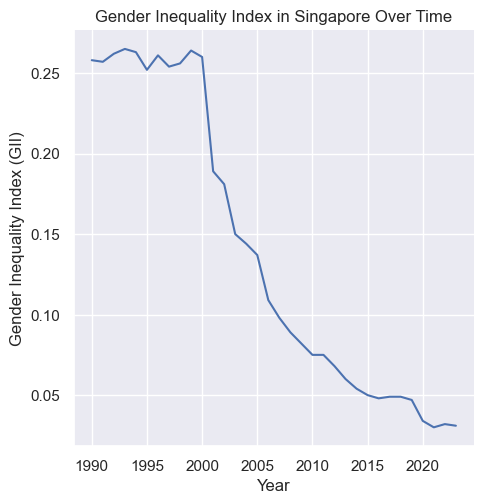

Caption: This line plot depicts the trend of the Gender Inequality Index (GII) in Singapore from 1990 to 2023.
Alt text: A line plot with Year on the x-axis and Gender Inequality Index GII on the y-axis, showing a decreasing trend over time.



In [22]:
singapore_gii = gii[gii["country"] == "Singapore"]

lineplot(singapore_gii, x="year", y="GII", 
        title="Gender Inequality Index in Singapore Over Time",
        xlabel="Year", ylabel="Gender Inequality Index (GII)",
        caption="This line plot depicts the trend of the Gender Inequality Index (GII) in Singapore from 1990 to 2023.",
        alt_text="A line plot with Year on the x-axis and Gender Inequality Index GII on the y-axis, showing a decreasing trend over time."
)

The variables in this plot are Gender Inequality Index (GII) on the y-axis over time in years on the x-axis. While looking at the data, I thought Singapore's GII trend was very interesting because it was a little above 0.25 for the first 10 years of data and then between the years 2000 and 2001, the GII drastically drops. I wonder what happened in 2000 that caused such a large fall in the GII. The GII rapidly decreased most years after and is very low relative to other countries in 2023.

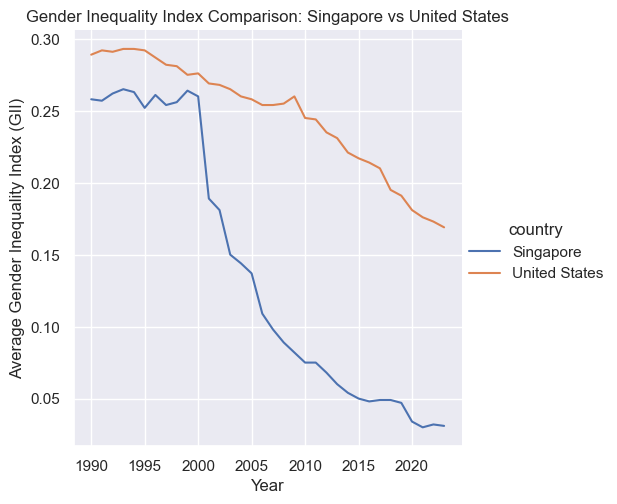

Caption: This line plot compares the average Gender Inequality Index (GII) between Singapore and the United States.
Alt text: A line plot with Year on the x-axis and Average Gender Inequality Index GII on the y-axis, showing Singapore has a lower GII than the United States.



In [23]:
usa_sgp_gii = gii[(gii["country"] == "Singapore") | (gii["country"] == "United States")]
lineplot(usa_sgp_gii, x="year", y="GII", hue="country",
        title="Gender Inequality Index Comparison: Singapore vs United States",
        xlabel="Year", ylabel="Average Gender Inequality Index (GII)",
        caption="This line plot compares the average Gender Inequality Index (GII) between Singapore and the United States.",
        alt_text="A line plot with Year on the x-axis and Average Gender Inequality Index GII on the y-axis, showing Singapore has a lower GII than the United States."
        )

This graph shows the Gender Inequality Index trends for the US and Singapore. The variables represented in the plot are the Year on the x-axis and the Average Gender Inequality Index (0-1 scale with higher numbers being worse) on the y-axis with there being separate lines for the US and Singapore. Both countries have a downward trend, but Singapore has had a consistenty lower GII. It's interesting to note that Singapore had a lower GII that the US by less than 0.05 in 1990 but in 2023 the disparity was greater with Singapore having a GII around 0.15 lower than the US.

## WHO Sanitation 

In [24]:
who_sanitation = pd.read_csv("who_sanitation.csv")
who_sanitation

,ISO3,Country,Residence Type,Service Type,Year,Coverage,Population,Service level
0,ABW,Aruba,total,Sanitation,2000,97.97310,8.696191e+04,At least basic
1,ABW,Aruba,total,Sanitation,2001,98.01251,8.851020e+04,At least basic
2,ABW,Aruba,total,Sanitation,2002,98.05191,8.959886e+04,At least basic
3,ABW,Aruba,total,Sanitation,2003,98.09132,9.054809e+04,At least basic
4,ABW,Aruba,total,Sanitation,2004,98.13072,9.147059e+04,At least basic
...,...,...,...,...,...,...,...,...
25941,ZWE,Zimbabwe,total,Sanitation,2020,18.26108,2.835378e+06,Unimproved
25942,ZWE,Zimbabwe,total,Sanitation,2021,19.06387,3.011560e+06,Unimproved
25943,ZWE,Zimbabwe,total,Sanitation,2022,19.95838,3.207123e+06,Unimproved
25944,ZWE,Zimbabwe,total,Sanitation,2023,20.81385,3.401154e+06,Unimproved


### Rows and Columns

In [25]:
who_sanitation.shape

(25946, 8)

The above code shows that the dataset contains 25946 rows and 8 columns. Each row represents a country in a specific year from 2000 to 2024 (although many countries do not have data for some years) and the corresponding value of the Gender Inequality Index (GII). For example, the first row shows Sanitation data for Aruba in 2000 and the second row shows GII data for Afghanistan in 2021. 

### Missing Data

In [26]:
missing = who_sanitation["Coverage"].isna().sum()
missing

0

There is no missing data in the dataset. This is because the dataset only includes countries which have data for all years. When combining with the WDI dataset, decisions will need to be made to decide what to do about the countries without data.

### Variables of Interest

The WHO/UNESCO Water Supply, Sanitation and Hygiene (WASH) website allow you to choose which indicators, countries, and years you want to focus on and create a dataset with just the information you need. I was able to select only the indicators that were relevant to my research questions across all countries and years. I only selected the Sanitation (At least basic) indicator because this was the only one relevant to my research questions.

1) Sanitation Coverage
* Represents the percentage of househoulds with at least basic sanitation levels for a given country in a given year
* Values range from 0.0 to 100 with a higher number meaning a country has a higher percentage of households with at least basic sanitation
* Useful for RQ1, "How does life expectancy correlate with sanitation?"

In [27]:
who_sanitation = who_sanitation[who_sanitation["Service level"] == "At least basic"]
who_sanitation["Coverage"].describe()

count    1930.000000
mean       76.371415
std        26.748415
min         4.534460
25%        60.160175
50%        89.169810
75%        97.716702
max       100.000000
Name: Coverage, dtype: float64

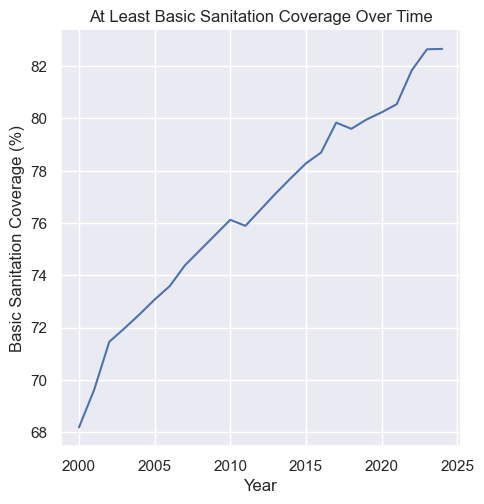

Caption: This line plot depicts the trend of basic sanitation coverage in the world from 2000 to 2024.
Alt text: A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing an increasing trend over time.



In [28]:
world_sanitation = who_sanitation.groupby("Year")["Coverage"].mean().reset_index()

lineplot(world_sanitation, x="Year", y="Coverage", 
        title="At Least Basic Sanitation Coverage Over Time",
        xlabel="Year", ylabel="Basic Sanitation Coverage (%)",
        caption="This line plot depicts the trend of basic sanitation coverage in the world from 2000 to 2024.",
        alt_text="A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing an increasing trend over time."
)

This data plots year on the x-axis and basic sanitation coverage on the y-axis. The trend is increaing at almost a constant rate over time.

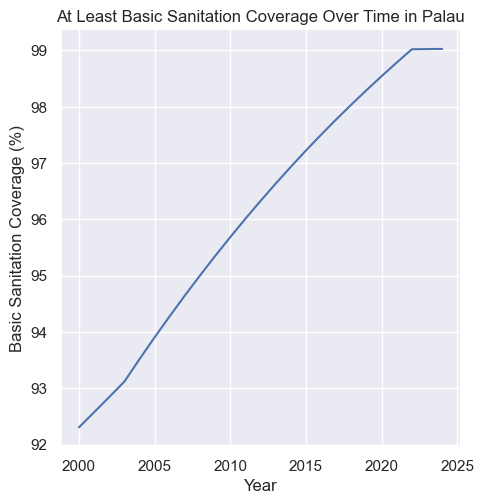

Caption: This line plot depicts the trend of basic sanitation coverage in Palau from 2000 to 2024.
Alt text: A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing a increasing trend over time.



In [29]:
palau_data = who_sanitation[(who_sanitation["Country"] == "Palau")]
lineplot(palau_data, x="Year", y="Coverage", 
        title="At Least Basic Sanitation Coverage Over Time in Palau",
        xlabel="Year", ylabel="Basic Sanitation Coverage (%)",
        caption="This line plot depicts the trend of basic sanitation coverage in Palau from 2000 to 2024.",
        alt_text="A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing a increasing trend over time."
)

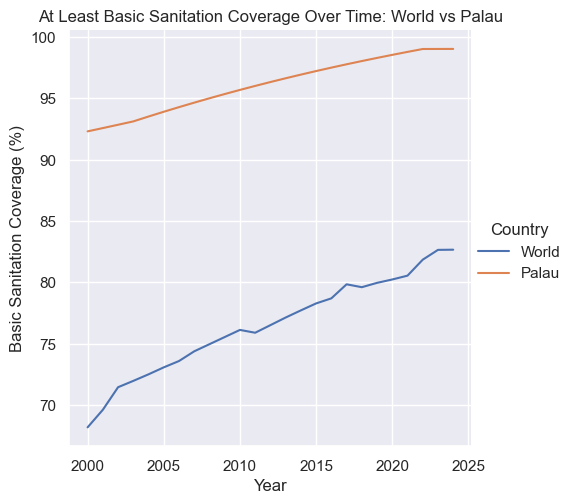

Caption: This line plot compares the basic sanitation coverage between the world and Palau from 2000 to 2024.
Alt text: A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing both World and Palau trends over time.



In [30]:
# graphs the sanitation coverage over time for the world and Palau on the same graph
combined_data = pd.concat([world_sanitation.assign(Country="World"), palau_data])
lineplot(combined_data, x="Year", y="Coverage", hue="Country",  
        title="At Least Basic Sanitation Coverage Over Time: World vs Palau",
        xlabel="Year", ylabel="Basic Sanitation Coverage (%)",
        caption="This line plot compares the basic sanitation coverage between the world and Palau from 2000 to 2024.",
        alt_text="A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing both World and Palau trends over time."
)

The line plot plots year on the x-axis and Basic Sanitation Coverage in Palau on the y-axis. The trend is almost linear and increasing, showing that Palau's Sanitation has improved.

## WDI/GII/WHO Sanitation

In [31]:
# Data Cleaning and Merging
wdi.reset_index(inplace=True)

gii.drop(columns=['country'], inplace=True)
gii.rename(columns={'countryIsoCode': 'Country Code', 'year': 'Year'}, inplace=True)

who_sanitation.rename(columns={'ISO3': 'Country Code', 'Coverage': 'Sanitation Coverage (%)'}, inplace=True)
who_sanitation = who_sanitation[who_sanitation["Service level"] == "At least basic"].copy()

merged_df_1 = pd.merge(wdi.reset_index(), gii[['Country Code', 'Year', 'GII']],
                       on=['Country Code', 'Year'],
                       how='outer')

final_merge = pd.merge(merged_df_1, who_sanitation[['Country Code', 'Year', 'Sanitation Coverage (%)']],
                    on=['Country Code', 'Year'],
                    how='outer')

final_merge['Life Expectancy Disparity (F-M) (Years)'] = (
    final_merge['Life expectancy at birth, female (years)'] - 
    final_merge['Life expectancy at birth, male (years)']
)

final_merge.rename(columns={'Population, total': 'Total Population', 
    'Life expectancy at birth, total (years)': 'Life Expectancy (Years)',
    'Age dependency ratio, old (% of working-age population)': 'Old Age Dependency Ratio (%)',
    'GDP growth (annual %)': 'GDP Growth (Annual %)', 
    'GII': 'Gender Inequality Index (GII)'
    }, inplace=True)

cols_to_keep = [
    'Country Name',
    'Country Code',
    'Year',

    'Sanitation Coverage (%)',
    'Life Expectancy (Years)',

    'Old Age Dependency Ratio (%)',
    'GDP Growth (Annual %)',

    'Gender Inequality Index (GII)',
    'Life Expectancy Disparity (F-M) (Years)'
]

pop_demographics = final_merge[cols_to_keep].copy()

pop_demographics = pop_demographics[pop_demographics['Country Name'] != 'World']

C:\Users\balac\AppData\Local\Temp\ipykernel_26132\507462123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  who_sanitation.rename(columns={'ISO3': 'Country Code', 'Coverage': 'Sanitation Coverage (%)'}, inplace=True)


### Number of rows and columns

In [32]:
pop_demographics.shape

(17251, 9)

The above code shows that the dataset contains 17251 rows and 10 columns. Each row represents a country in a specific year and each column is a relevant indicator for our research. 

In [33]:
missing = pop_demographics.isna().sum()
missing[missing > 0]

Country Name                                 385
Sanitation Coverage (%)                    15321
Life Expectancy (Years)                      389
Old Age Dependency Ratio (%)                 385
GDP Growth (Annual %)                       3432
Gender Inequality Index (GII)              12651
Life Expectancy Disparity (F-M) (Years)      389
dtype: int64

In [34]:
percent_missing = pop_demographics.isna().sum().sum() / (wdi.shape[0] * wdi.shape[1]) * 100
print(f"Total missing data: {percent_missing:.2f}%")

Total missing data: 19.46%


Every column has some amount of missing data, shown above. 19.69% of the total data is missing but much of this is to be expected because the datasets do not all start in the same year. 

To work with the missing data, I plan to remove the 385 countries with missing country names. The other missing pieces, especially Sanitation Data and GII are to be expected.

In [35]:
# remove rows with missing values for country name
pop_demographics = pop_demographics.dropna(subset=['Country Name'])
pop_demographics

,Country Name,Country Code,Year,Sanitation Coverage (%),Life Expectancy (Years),Old Age Dependency Ratio (%),GDP Growth (Annual %),Gender Inequality Index (GII),Life Expectancy Disparity (F-M) (Years)
0,Aruba,ABW,1960,NaN,64.049,5.229128,NaN,NaN,6.713
1,Aruba,ABW,1961,NaN,64.215,5.222317,NaN,NaN,6.280
2,Aruba,ABW,1962,NaN,64.602,5.256221,NaN,NaN,6.551
3,Aruba,ABW,1963,NaN,64.944,5.302170,NaN,NaN,6.788
4,Aruba,ABW,1964,NaN,65.303,5.382927,NaN,NaN,7.078
...,...,...,...,...,...,...,...,...,...
17310,Zimbabwe,ZWE,2019,NaN,61.060,6.554177,-6.332450,0.525,4.219
17311,Zimbabwe,ZWE,2020,NaN,61.530,6.604042,-7.816933,0.519,4.656
17312,Zimbabwe,ZWE,2021,NaN,60.135,6.598137,8.468039,0.519,4.572
17313,Zimbabwe,ZWE,2022,NaN,62.360,6.586732,6.139176,0.520,4.664


### Variables of Interest

The variables of interest for the merged population demographics dataset are the same as those for the three base datasets above.

## EDA Results

1. What steps did you take during your EDA that prepared the work you conducted for the rest of your analysis?
The most crucial steps I took were data cleaning and merging my dataframes. All three of my dataframes had some columns that were unnecessary, lengthy or unintuitive column names, and missing data and it was well worth my time to perform an EDA to be able to recognize all of these things. I was able to remove irrelevant columns from my dataframes so that my merged master dataframe only had columns corresponding to the variables of interest. This set up is crucial to conducting the rest of my analysis.

2. What did you learn about your data from doing the EDA?
Looking at the missing data for the master dataframe helped me decide on an appropriate time frame to answer my research questions with. The WDI Data (GDP, Life Expectancy, Population, Dependency Ratio) starts in 1960, WHO Sanitation Data starts in 2000, and GII Data starts around 2008. By performing this EDA, I now know which time frames are appropriate for the variables of interest for each research question.

3. How did your understanding of the data setting change?
After performing the EDA, I have many more indicators I plan on using among all three of the dataframes that I merged. I also have more information on the missing datapoints for some countries during some years.

# Results

In [36]:
# Main Plotting Function Using Altair
def analyze_and_plot_correlation_altair(df, x_col, y_col, min_year, title_prefix, caption):
    """
    Analyzes the correlation between two variables in a DataFrame and creates a scatter plot with a regression line using Altair.
    Takes in a DataFrame, two column names for x and y axes, a minimum year for filtering, and a title prefix.
    Returns an Altair chart object displaying the scatter plot with regression line and correlation coefficient in the title.
    """
    data = df[df['Year'] >= min_year].copy()
    data.dropna(subset=[x_col, y_col, 'Country Name'], inplace=True)
    
    latest_year = data['Year'].max()
    data_latest = data[data['Year'] == latest_year].copy()

    correlation = data_latest[x_col].corr(data_latest[y_col])
    slope, intercept = np.polyfit(data_latest[x_col], data_latest[y_col], 1)
    
    line_data = pd.DataFrame({
        x_col: [data_latest[x_col].min(), data_latest[x_col].max()],
        y_col: [
            intercept + slope * data_latest[x_col].min(), 
            intercept + slope * data_latest[x_col].max()
        ]
    })
    
    base = alt.Chart(data_latest).encode(
        x=alt.X(x_col, axis=alt.Axis(title=x_col)),
        y=alt.Y(y_col, axis=alt.Axis(title=y_col))
    ).properties(
        title=f'{title_prefix} ({latest_year}) | r = {correlation:.2f}',
    )
    
    scatter = base.mark_circle(size=60, opacity=0.6).encode(
        tooltip=['Country Name', x_col, y_col],
        color=alt.Color('Country Name', legend=None) 
    )
    
    regression_line = alt.Chart(line_data).mark_line(color='red').encode(
        x=x_col,
        y=y_col
    )
    
    chart = (scatter + regression_line)

    chart = chart.properties(width=800, height=500)
    print(f"Caption: {caption}\n")
    
    return chart

## Research Question 1: How does life expectancy correlate with sanitation?
 - This question looks into the factors of life expectancy and if nations that have better sanitation have higher life expectancies.

In [37]:
analyze_and_plot_correlation_altair(pop_demographics, 'Sanitation Coverage (%)', 'Life Expectancy (Years)', 2000,
                            'RQ1: Sanitation vs Life Expectancy', caption="Scatter plot showing the correlation " \
                            "between sanitation coverage and life expectancy for various countries in 2023.")

Caption: Scatter plot showing the correlation between sanitation coverage and life expectancy for various countries in 2023.



c:\Users\balac\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\balac\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

### Presentation of Results:
In my analysis of the global statistics for sanitation and life expectancy in 2023, I found a correlation coefficient of r = 0.81. From doing my own research online, I found that correlation coefficients whose magnitudes are between 0.8 and 1.0 indicate variables which can be considered highly correlated. Since the "At Least Basic" Sanitation Coverage as a percentage and the Life Expectancy in years have a correlation coefficient of 0.81, I can confidently say that these two factors are correlated.

### Interpretation of Results:
The findings above do not surprise me. One of the main ways in which humans have improved life expectancy in our societies has been to improve our sanitation. While doing research to justify the results above, I learned that some of the most major causes of death in the 20th century, typhoid and cholera, were transmitted by contaminated water. The prevalence of these two illnesses have been reduced dramatically by improved sanitation. As viewers, by looking at this graph, we can infer that for countries on the lower end of life expectancy, improving sanitation can have massive positive results.

## Research Question 2: Are countries with rapidly aging populations experiencing slower economic growth?
 - Does a higher old-age dependency ratio correlate with lower GDP growth?

In [38]:
analyze_and_plot_correlation_altair(
    pop_demographics, 'Old Age Dependency Ratio (%)', 'GDP Growth (Annual %)', 1960, 'RQ2: GDP Growth vs. Aging Population Trend',
    caption="Scatter plot showing the correlation between old age dependency ratio and GDP growth for various countries in 2023.")

Caption: Scatter plot showing the correlation between old age dependency ratio and GDP growth for various countries in 2023.



c:\Users\balac\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\balac\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

### Presentation of Results:
The above analysis is meant to demonstrate the correlation between the Old Age Dependency Ratio (%) and the Annual GDP Growth of countries in the world in 2023. For context, old-age dependency ratio is the number of individuals aged 65 or older per 100 people of working age, defined as those aged between 20 to 64 years old. Through my analysis, I found a correlation coeffient of r = -0.06. From online research, I learned that a correlation coefficient of -0.06 indicates that there's no relationship. As old age dependency ratio increases, there is no tendency for the GDP growth to change in a specific direction.

### Interpretation of Results:
The results above surprised me slightly, but they do make sense. I thought that if there were fewer working members in the society (more older people) and more younger people that have to take care of them, that the Annual GDP Growth would be lower. But thinking about it in a more nuanced way, the countries that typically have high old age dependency ratios are wealthy countries, with great healthcare, and the most modern technology. It makes sense that these coutries would continue to have good GDP growth despite the aging population.

## Research Question 3: Is there a connection between Gender Inequality Index and life expectancy disparity between men and women?
 - Do countries with higher gender inequality have a greater gap in life expectancy between genders?

In [39]:
analyze_and_plot_correlation_altair(pop_demographics, 'Gender Inequality Index (GII)', 'Life Expectancy Disparity (F-M) (Years)', 2008,
                            'RQ3: Gender Inequality Index (GII) vs Life Expectancy Disparity (F-M) (Years)',
                            caption="Scatter plot showing the correlation between Gender Inequality Index and Life Expectancy Disparity for various countries in 2023.")

Caption: Scatter plot showing the correlation between Gender Inequality Index and Life Expectancy Disparity for various countries in 2023.



c:\Users\balac\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\balac\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

### Presentation of Results:
The above analysis is meant to demonstrate the correlation between the Gender Inequality Index (GII) and the Life Expectancy Disparity between Females and Males in years of countries in the world in 2023. For context, a GII score of 0 indicates no inequality, while a score of 1 indicates the maximum possible inequality. Through my analysis, I found a correlation coeffient of r = -0.17. From online research, I learned that a correlation coefficient that close to 0 indicates that there's no relationship between the two variables of interest.

### Interpretation of Results:
The results above show that there isn't a strong correlation between GII and Life Expectancy Disparity. This surprised me a little because I though that if a country had a low GII, meaning little inequality, women would live longer. But the key point is that the graph shows the disparity between female and male lifespans, not just the female life span. Since we are implicitly looking at the male life expectancy too, I don't think that would show much correlation with GII. Males tend to have a lower life expectancy due to many other, unrelated factors so the life expectancy disparity is probably more influenced by those factors than the Gender Inequality Index.

## Impact and Limitations
1) Who might benefit from your analysis, who might be excluded, and who might be harmed by it?
* Benefit: Public health officials and especially non-profits may benefit from my results from RQ1 showing that sanitation and life expectancy are highly correlated. This data may allow for more efforts to be put towards raising countries' sanitation levels to also raise their life expectancies.
* Excluded: Countries without much data might be excluded from my analysis. One of my main reasons for choosing the most recent year in the dataset to perform the anlysis on was to include as many countries as possible. Still however, if countries didn't have datapoints for both variables in each analysis, they wouldn't have a valid datapoint for that graph and would have to be excluded. Also, years other than 2023 were excluded which could've had more significant results.
* Harmed: I'm not sure who would be harmed by my analysis. Maybe groups that are trying to establish a strong correlation between Old Age Dependency and GDP growth or Gender Inequality Index and Life Expectancy Disparity, since my data disproves those theories.

2) How did the data setting impact your results?
* The data setting evolved throughout the process of my project. Since I ultimately decided to focus on just one year (2023) and all countries instead of all years and all countries (which would've been a lot harder to display on a graph), the data setting of 2023 limited my results to only 2023. It would be interesting to see which years have the highest correlation for all three research questions and explore why. 
* Also, having a lot of countries excluded due to missing data impacted my results. Having the data for these countries would've impacted each research question's correlation coefficient.

3) Explain at least 3 limitations of your analysis and how others should use your conclusions.
* One limitation directly relates to the fact that many countries were excluded if they didn't have enough data. Those countries could've changed the linear regression trends on the graphs or made the correlation coefficients weaker or stronger.
* Since we only looked at data for 2023, we overlooked a lot of major trends and shifts in these variables over the past few decades. It was important for me to present the data as clearly as possible so I decided to do it this way, but there is probably more that can be done to show more years of data.
* Data isn't weighed by the population of a country. Countries with higher populations should probably have more of an impact on the results than countries with smaller populations. I'm sure there's a really fancy, high tech model for that somewhere but I didn't know how do represent the data in this way.
* Others should use my findings to view the correlation between sanitation and life expectancy in 2023 but nobody should draw conclusions that sanitation is the sole cause of life expectancy increases. My data can be a starting point for other analyses.